In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


1: Data Understanding & Visualization 

Top 5 categories by sales:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Top 5 states by profit:
State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64


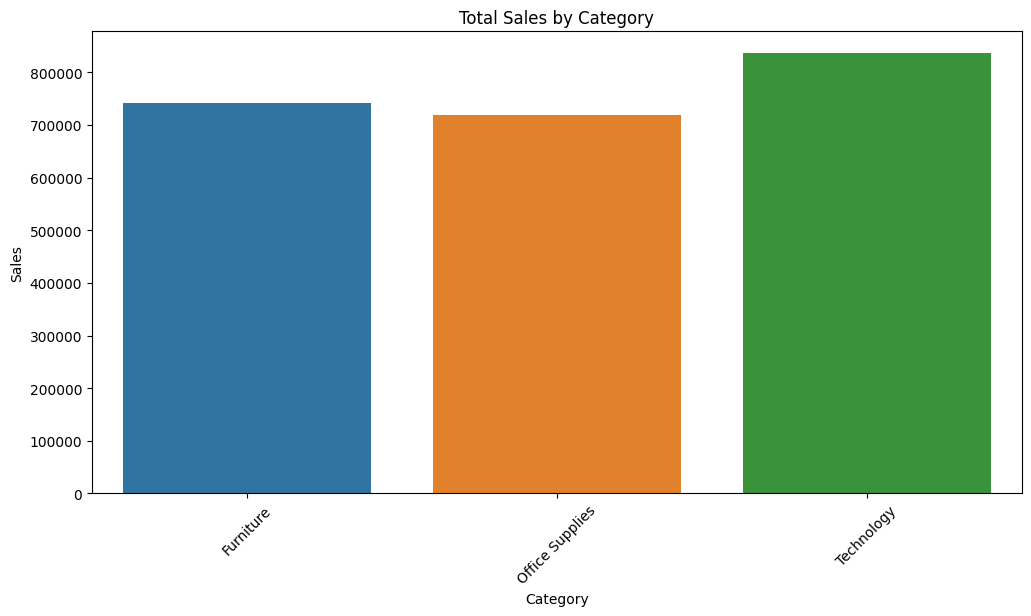

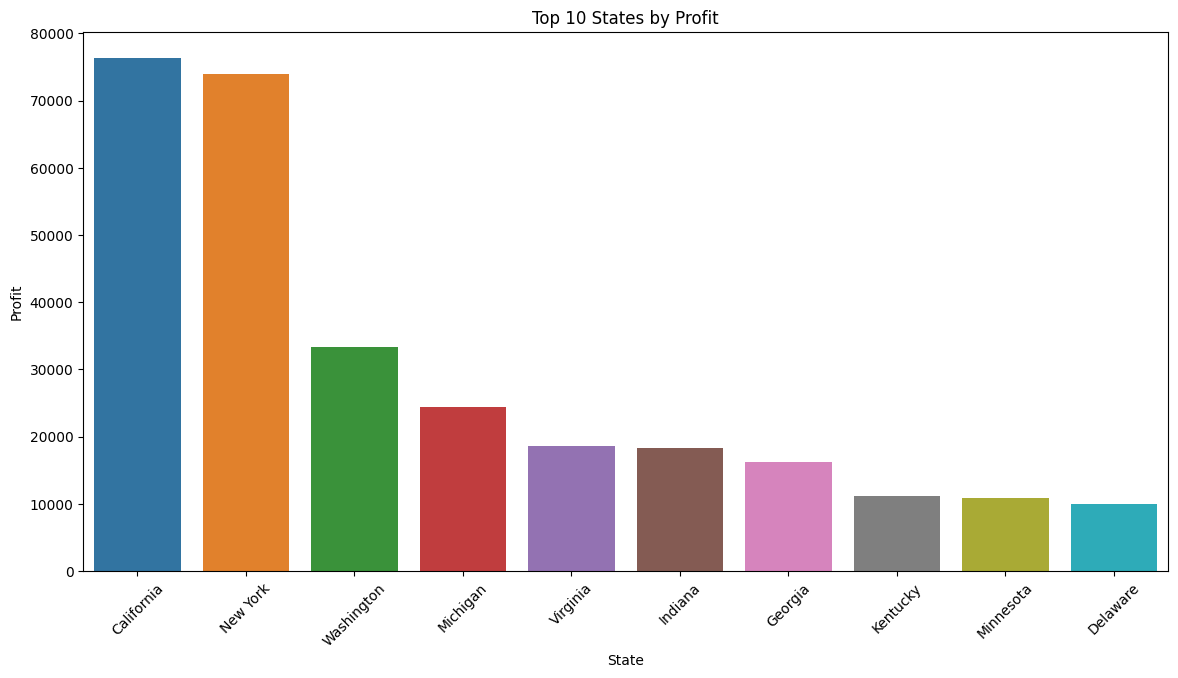

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 1: Load the dataset
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='ISO-8859-1')

# 🧹 Step 2: Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df.dropna(inplace=True)

# 🧐 Step 3: Exploratory Analysis
print("Top 5 categories by sales:")
print(df.groupby('Category')['Sales'].sum().sort_values(ascending=False))

print("\nTop 5 states by profit:")
print(df.groupby('State')['Profit'].sum().sort_values(ascending=False).head())

# 📊 Step 4: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales')
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States by Profit")
plt.xticks(rotation=45)
plt.ylabel("Profit")
plt.xlabel("State")
plt.show()


Best-selling category: Technology
Top profit region: West


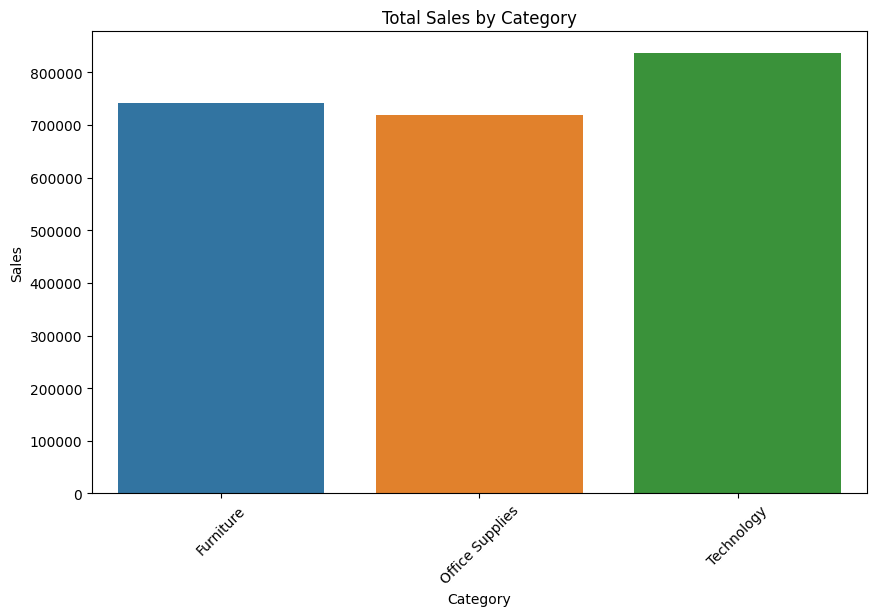

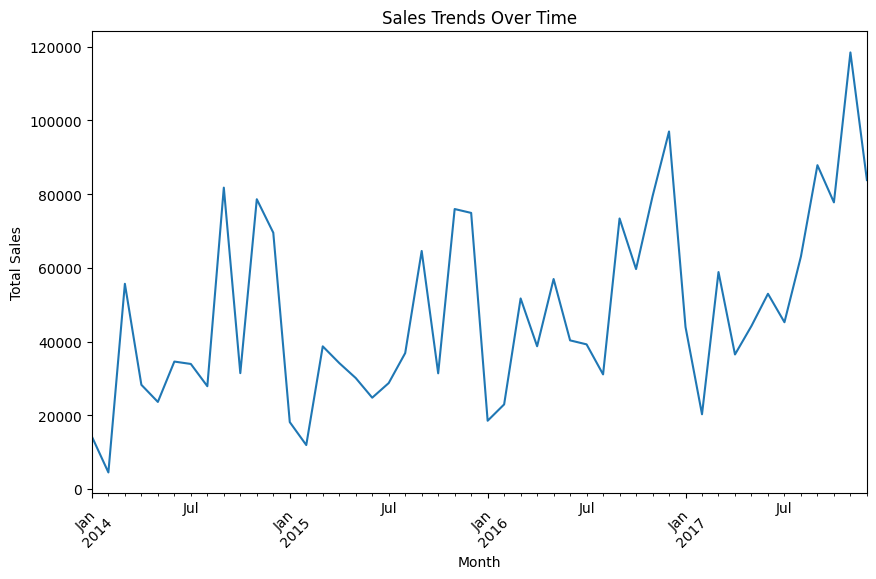

Category Technology dominates sales like a galactic overlord!
Region West rakes in profits—time to invest there!
Sales spike in later months—holiday shopping strikes again!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='latin1')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna()  # Zap those pesky nulls like Vogons zapping Earth

# Exploratory Analysis
best_category = df.groupby('Category')['Sales'].sum().idxmax()
top_region = df.groupby('Region')['Profit'].sum().idxmax()
print(f"Best-selling category: {best_category}")
print(f"Top profit region: {top_region}")

# Visualize Insights
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df.groupby('Category')['Sales'].sum().reset_index())
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Key Insights
insights = [
    f"Category {best_category} dominates sales like a galactic overlord!",
    f"Region {top_region} rakes in profits—time to invest there!",
    "Sales spike in later months—holiday shopping strikes again!"
]
for insight in insights:
    print(insight)